#**2. gyakorlat - Markov-sorok, M/M/1 sorok, Poisson pontfolyamat**

##1. Markov-sorok




1.  A strandon a főtt kukorica-árusnál sorbanállnak a vevők. Egy vevő kiszolgálása átlagosan 1 percig tart, a többiek addig várakoznak. Átlagosan 2 percenként érkezik egy vevő.

	(a) Modellezzük a sor hosszát folytonos idejű Markov-lánccal. Mit kell feltenni, hogy teljesüljön a Markov-tulajdonság? Mik a lehetséges állapotok?

  (b) Milyen típusú a sor? Mekkora a terhelése?

	(c) Átlagosan mennyi időt tölt egy ügyfél a kukoricaárusnál (beleértve a várakozást és a kiszolgálást is)?

  (d) Feltéve, hogy egy vevő előtt 3-an vannak a sorban, mekkora a valószínűsége, hogy 5 percnél többet kell várnia a kiszolgálás végéig? És ha nincs előtte senki?

  (e) A vevők mekkora részének kell 5 percnél többet várnia a kukoricára?



In [ ]:
import numpy as np
import numpy.linalg as npl
from scipy.stats import erlang, expon

# (b)
lmbd=1/2;
mu=1;
rho = lmbd/mu;
print("ez egy M/M/1 sor, a terhelése:",rho);

# (c)
print("az átlagos sorban töltött idő:",1/((1-rho)*mu));

# (d)
time = 5;
ncustomers = 3;
print("P(egy vevőnek 5 percnél többet kell várnia|előtte 3-an vannak)=",1-erlang.cdf(time,ncustomers+1,0,1/mu))
ncustomers = 0;
print("P(egy vevőnek 5 percnél többet kell várnia|hogy nincs előtte senki)=",1-erlang.cdf(time,ncustomers+1,0,1/mu))
print(1-expon.cdf(time,0,1/mu))
# (e)
print("annak a valószínűsége, hogy egy véletlen vevőnek 5 percnél többet kell várnia:",1-expon.cdf(time,0,1/(mu-rho)))


ez egy M/M/1 sor, a terhelése: 0.5
az átlagos sorban töltött idő: 2.0
P(egy vevőnek 5 percnél többet kell várnia|előtte 3-an vannak)= 0.2650259152973615
P(egy vevőnek 5 percnél többet kell várnia|hogy nincs előtte senki)= 0.006737946999085476
0.006737946999085476
annak a valószínűsége, hogy egy véletlen vevőnek 5 percnél többet kell várnia: 0.08208499862389884


2.  Tekintsük a következő rendszert: adott 3 sor (A, B és C), melyek közül az A sorban maximum 3 igény lehet, a B sorban 1, a C sorban 2 (beleértve az éppen kiszolgálás alatt álló igényeket is). A B sorban egy 2 rátájú FIFO szerver szolgálja ki az igényeket, a C sorban pedig egy 3 rátájú FIFO szerver. A rendszerbe bekerülő igények az A sor végére érkeznek 4 rátával, ahonnan FIFO módon továbbmegy minden igény a B vagy C sorba attól függően, a B és C sor közül melyikben van szabad hely. Ha mindkét sorban van hely, akkor az igény a C sor felé megy tovább. Ha az A sor tele van, a további érkezések elvesznek.

  (a) Modellezzük a rendszert folytonos idejű Markov lánccal. Mik az állapotok? Írjuk fel a generátort.

	(b) Határozzuk meg a rendszer stacionárius eloszlását.

	(c) Mekkora a csomagvesztés aránya tele sor miatt?

	(d) Mennyi az átlagos sorhossz az A, B, C sorokban és a teljes rendszerben?

	(e) Mennyi az effektív érkezési ráta az A, B, C sorokba és a teljes rendszerbe?

	(f) A rendszerbe kerülő igények mekkora része kerül a C sorba?

	(g) Átlagosan mennyi időt tölt el egy bekerülő igény az A, B, C sorokban illetve a teljes rendszerben?

  (h) Vizsgáljuk meg a rendszert abban az esetben, hogyha pl. a B sorok kiszolgálási rátáját 0-ra módosítjuk.

In [ ]:
import numpy as np
import numpy.linalg as npl

# (a)
# állapotok: 000, 001, 002, 010, 011, 012, 112, 212, 312
lmbd = 4;
muB = 2;
muC = 3;
G = np.array([
 [-lmbd, lmbd, 0, 0, 0, 0, 0, 0, 0], # 000
 [muC, -(lmbd+muC), lmbd, 0, 0, 0, 0, 0, 0], # 001
 [0, muC, -(lmbd+muC), 0, 0, lmbd, 0, 0, 0], # 002
 [muB, 0, 0, -(lmbd+muB), lmbd, 0, 0, 0, 0], # 010
 [0, muB, 0, muC, -(lmbd+muB+muC), lmbd, 0, 0, 0], # 011
 [0, 0, muB, 0, muC, -(lmbd+muB+muC), lmbd, 0, 0], # 012
 [0, 0, 0, 0, 0, muB+muC, -(lmbd+muB+muC), lmbd, 0], # 112
 [0, 0, 0, 0, 0, 0, muB+muC, -(lmbd+muB+muC), lmbd], # 212
 [0, 0, 0, 0, 0, 0, 0, muB+muC, -(muB+muC)]]); # 312
print("generátor:\n",G)

# (b)
A=np.copy(np.transpose(G))
# kicseréljük az egyik egyenletet a normalizálásra
A[0]=[1, 1, 1, 1, 1, 1, 1, 1, 1]
b = [1,0,0,0,0,0,0,0,0]

vst=npl.solve(A,b)
print("stacionárius eloszlás:\n",vst)

# (c)
print("a csomagvesztés aránya:",vst[-1])

# (d)
states = np.array([
 [0,0,0],
 [0,0,1],
 [0,0,2],
 [0,1,0],
 [0,1,1],
 [0,1,2],
 [1,1,2],
 [2,1,2],
 [3,1,2]]);
[LA, LB, LC]=vst@states;
print("átlagos sorhossz az A sorban:\n",LA);
print("átlagos sorhossz a B sorban:\n",LB);
print("átlagos sorhossz a C sorban:\n",LC);
L=sum(vst@states);
print("átlagos sorhossz az egész rendszerben:",L)

# (e)
lmbdA = lmbd * (1-vst[-1]);
lmbdB = lmbd * vst[2] + muB*(vst[-3]+vst[-2]+vst[-1])
lmbdC = lmbd * (vst[0]+vst[1]+vst[3]+vst[4]) + muC*(vst[-3]+vst[-2]+vst[-1])
lmbde = lmbdA;
print("az A sorba érkező effektív ráta:",lmbdA);
print("a B sorba érkező effektív ráta:",lmbdB);
print("a C sorba érkező effektív ráta:",lmbdC);
print("a rendszerbe érkező effektív ráta:",lmbde);

# (f)
print("a rendszer bekerülő igények",lmbdC/lmbde,"része kerül a C sorba");

# (g)
print("az A sorban eltöltött átlagos idő:\n",LA/lmbdA);
print("a B sorban eltöltött átlagos idő:\n",LB/lmbdB);
print("a C sorban eltöltött átlagos idő:\n",LC/lmbdC);
print("a rendszerben eltöltött átlagos idő:\n",L/lmbde);


generátor:
 [[-4  4  0  0  0  0  0  0  0]
 [ 3 -7  4  0  0  0  0  0  0]
 [ 0  3 -7  0  0  4  0  0  0]
 [ 2  0  0 -6  4  0  0  0  0]
 [ 0  2  0  3 -9  4  0  0  0]
 [ 0  0  2  0  3 -9  4  0  0]
 [ 0  0  0  0  0  5 -9  4  0]
 [ 0  0  0  0  0  0  5 -9  4]
 [ 0  0  0  0  0  0  0  5 -5]]
stacionárius eloszlás:
 [0.13145049 0.15209148 0.1332611  0.03476377 0.06952753 0.16223091
 0.12978473 0.10382778 0.08306222]
a csomagvesztés aránya: 0.08306222424367082
átlagos sorhossz az A sorban:
 0.5866269587209252
átlagos sorhossz a B sorban:
 0.5831969338358629
átlagos sorhossz a C sorban:
 1.445952483726212
átlagos sorhossz az egész rendszerben: 2.615776376283
az A sorba érkező effektív ráta: 3.6677511030253167
a B sorba érkező effektív ráta: 1.1663938676717258
a C sorba érkező effektív ráta: 2.5013572353535904
a rendszerbe érkező effektív ráta: 3.6677511030253167
a rendszer bekerülő igények 0.6819866357044688 része kerül a C sorba
az A sorban eltöltött átlagos idő:
 0.15994186689414405
a B sorban el

3. Az ügyfelek sorbanállnak egy belvárosi ATM-nél. Az ATM-et egyszerre egy ügyfél használhatja, a többiek addig várakoznak. Minden ügyfél átlagosan 2 percig használja az ATM-et. Átlagosan 5 percenként érkezik egy ügyfél. Ha legalább 2-en állnak az ATM-nél (beleértve azt is, aki éppen használja), akkor a további érkezők egyből távoznak és nem jönnek vissza.

  (a) Modellezzük az ATM-nél állók számát folytonos idejű Markov-lánccal. Mit kell feltenni, hogy teljesüljön a Markov-tulajdonság? Mik a lehetséges állapotok? Írjuk fel a generátort.

  (b) Hosszú távon átlagosan az idő mekkora részében van az ATM használatban?

  (c) A várakozást és a használatot is figyelembe véve átlagosan mennyi időt tölt egy ügyfél az ATM-nél?

  (d) Az ügyfelek mekkora része tölt több, mint 5 percet az ATM-nél?


##2. Poisson-folyamatok

6. Egy kis forgalmú úton átlagosan 2 percenként halad el egy autó. Kiállok az út mellé és számolom az autókat. Mekkora a valószínűsége annak, hogy...

  (a) 5 percen keresztül egy autó sem halad el mellettem?

  (b) 4 perc alatt legfeljebb 3 autó megy el mellettem?

  (c) 2 percen át nem megy el mellettem autó, majd az azt követő 2 percben pontosan 3?

  (d) Minden tizedik elhaladó autó piros. Mekkora annak a valószínűsége, hogy 5 perc alatt nem megy el mellettem piros autó?

  (e) Mekkora annak a valószínűsége, hogy 3 perc alatt 1 piros és 2 más színű autó megy el mellettem?


In [ ]:
from scipy.stats import poisson
# (a)
time = 5;
rate = 1/2;
print("P(5 percen keresztül egy autó sem halad el mellettem)=",poisson.pmf(0, time*rate));
# pmf = probability mass function

# (b)
time = 4;
k=3;
p=sum([poisson.pmf(k, time*rate) for k in range(k+1)])
print("P(4 perc alatt legfeljebb 3 autó megy el mellettem)=",p)

# (c)
time = 2;
print("P(2 perc alatt 0, majd 2 perc alatt 3 autó)=",poisson.pmf(0, time*rate)*poisson.pmf(3, time*rate))

# (d)
time = 5;
redprob = 1/10;
redrate = rate*redprob;
print("P(5 percen keresztül egy piros autó sem halad el mellettem)=",poisson.pmf(0, time*redrate));

# (e)
time = 3;
nonredrate = rate - redrate;
print("P(3 perc alatt 1 piros és 2 más színű autó halad el mellettem)=",poisson.pmf(1, time*redrate)*poisson.pmf(2, time*nonredrate));


P(5 percen keresztül egy autó sem halad el mellettem)= 0.0820849986238988
P(4 perc alatt legfeljebb 3 autó megy el mellettem)= 0.857123460498547
P(2 perc alatt 0, majd 2 perc alatt 3 autó)= 0.02255588053943545
P(5 percen keresztül egy piros autó sem halad el mellettem)= 0.7788007830714049
P(3 perc alatt 1 piros és 2 más színű autó halad el mellettem)= 0.03049910376528851


11. Egy úton az elhaladó kamionokat számoljuk. A kamionforgalom sűrűsége napközben nem állandó, az óránként elhaladó kamionok számának rátafüggvénye a következő:
	$$r(x)=6-4\cos\left(\frac{\pi}{6}x\right) \qquad x\in [0,24]$$

  (a) Ábrázoljuk a rátafüggvényt. Hol van maximuma?
  
  (b) Mekkora az egy nap alatt elhaladó kamionok számának várható értéke?

  (c) Mekkora annak a valószínűsége, hogy 12 és 13 óra között pontosan 3 kamion halad el?

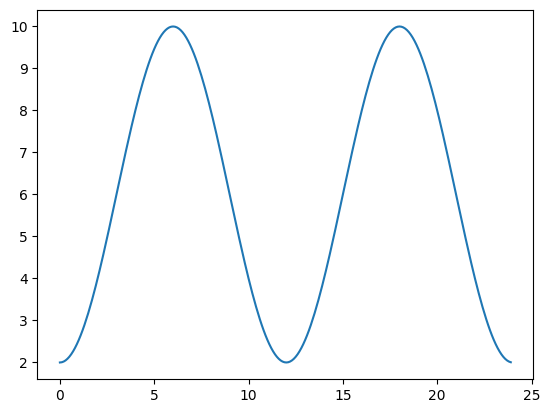

Optimization terminated successfully.
         Current function value: -10.000000
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: -10.000000
         Iterations: 17
         Function evaluations: 34
maximumhelyek: 6.0 , 18.0
 az egy nap alatt elhaladó kamionok számának várható értéke: (144.0, 7.046247698434017e-08)
P(12 és 13 óra között pontosan 3 kamion)= 0.19521006790126696


In [ ]:
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.integrate as integrate

# (a)
x = np.arange(0,24,0.1)   # start,stop,step
y = 6-4*np.cos(np.pi/6*x)
plt.plot(x,y)
plt.show()

def f(x): return (6-4*np.cos(np.pi/6*x))
def f2(x): return -(6-4*np.cos(np.pi/6*x))
min1=opt.fmin(f2, 5)[0]
min2=opt.fmin(f2, 20)[0]
print("maximumhelyek:",min1,",",min2)

# (b)
b=integrate.quad(f, 0, 24)
print("az egy nap alatt elhaladó kamionok számának várható értéke:",b)

# (c)
c=integrate.quad(f, 12, 13)[0]
print("P(12 és 13 óra között pontosan 3 kamion)=",poisson.pmf(3, c))
